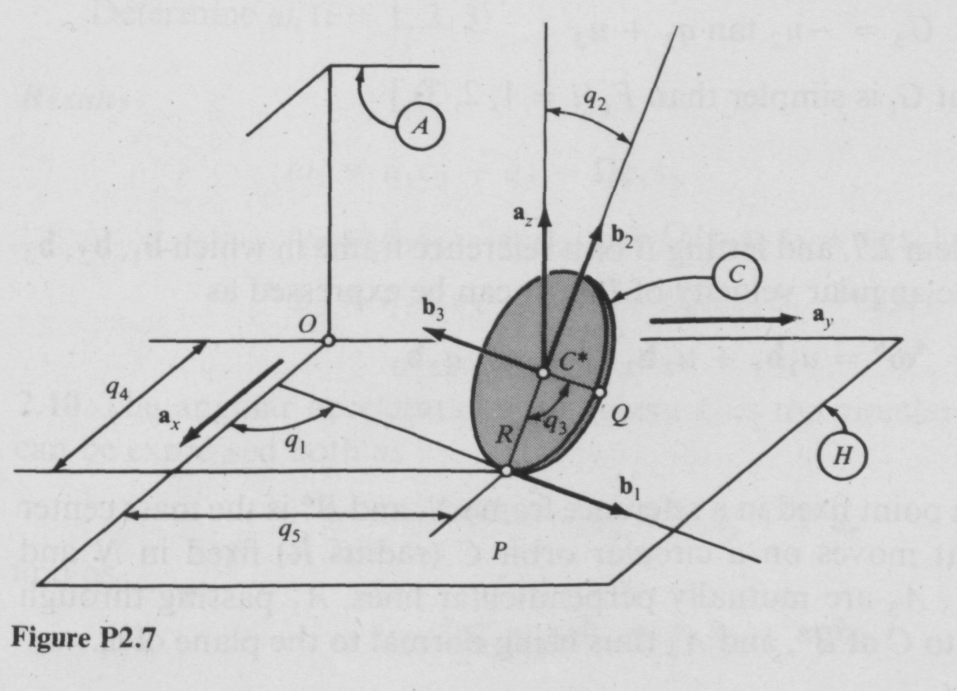

In [1]:
# 2021 / 07 / 07
# Dongil Choi
from IPython.display import Image
Image('figure/kane_fig_2.7.PNG', width=700)

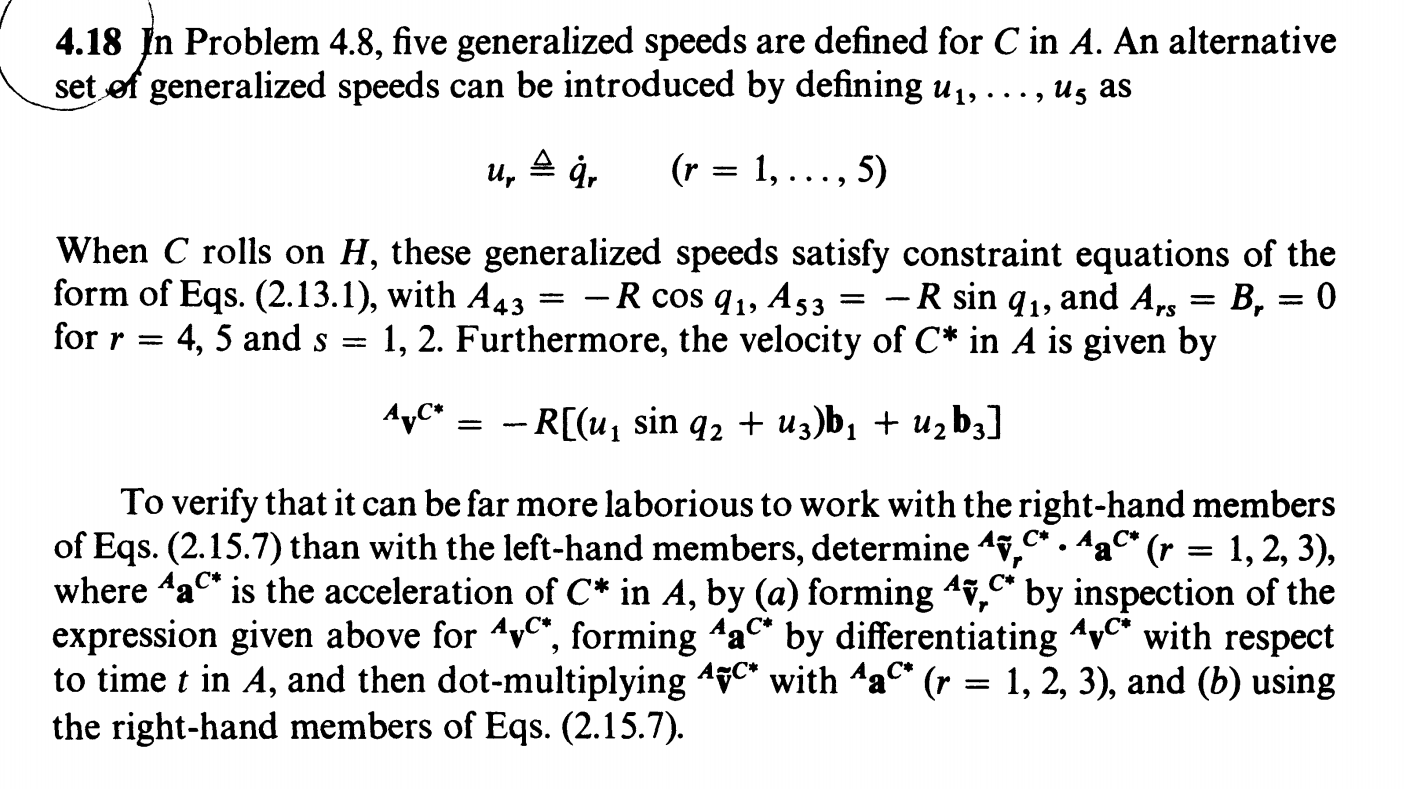

In [3]:
from IPython.display import Image
Image('figure/kane_fig_4.18.PNG', width=700)

In [4]:
from sympy.physics.mechanics import dynamicsymbols, msprint
from sympy.physics.mechanics import ReferenceFrame, Point
from sympy import solve, symbols, pi

# Define generalized coordinates, speeds, and constants:
qi = dynamicsymbols('q0 q1 q2 q3 q4 q5')
qid = dynamicsymbols('q0 q1 q2 q3 q4 q5', level=1)
ui = dynamicsymbols('u0 u1 u2 u3 u4 u5')
R = symbols('R')

A = ReferenceFrame('A')
A_1 = A.orientnew("A'", 'Axis', [qi[1], A.z])
B = A_1.orientnew('B', 'Axis', [pi/2 - qi[2], A_1.x])
C = B.orientnew('C', 'Axis', [qi[3], B.z])

pO = Point('O')
pCs = pO.locatenew('C*', qi[4] * A.x + qi[5] * A.y + R * B.y)

pO.set_vel(A, 0) # Point O is fixed in Reference Frame A
pCs.v2pt_theory(pO, A, B) # Point C* is fixed in Reference Frame B

# Set ui = qid
kinematic_eqs = []
for u, qd in zip(ui, qid):
   kinematic_eqs.append(u - qd)
soln = solve(kinematic_eqs, qid)
print("kinematic equations:")
for qd in qid:
   print("{0} = {1}".format(msprint(qd), msprint(soln[qd])))

print("\nposition of C* from O = {0}".format(msprint(pCs.pos_from(pO))))
print("\nvelocity of C* wrt A = {0}".format(msprint(pCs.vel(A).express(B))))

kinematic equations:
q0' = u0
q1' = u1
q2' = u2
q3' = u3
q4' = u4
q5' = u5

position of C* from O = q4*A.x + q5*A.y + R*B.y

velocity of C* wrt A = (-R*sin(q2)*q1' + q4*sin(q1)*q1' - q5*cos(q1)*q1')*B.x + ((q4*sin(q1)*q2' - q5*cos(q1)*q2')*cos(q2) + q4*sin(q2)*cos(q1)*q1' + q5*sin(q1)*sin(q2)*q1')*B.y + (-R*q2' + (q4*sin(q1)*q2' - q5*cos(q1)*q2')*sin(q2) - q4*cos(q1)*cos(q2)*q1' - q5*sin(q1)*cos(q2)*q1')*B.z
